In [7]:
import pandas as pd 

import matplotlib.pyplot as plt
import scikitplot as skplt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.naive_bayes import MultinomialNB

import cleaner as dc

In [10]:
df = pd.read_csv('data/balanced_emotional_appeal_dataset.csv')
df

,ad,emotion
0,tea with starr and a friend feel free to post ...,0
1,defamedtoo click the link below to sign the pe...,0
2,something to think about,0
3,levy et al j am coll cardiol conducted a prosp...,0
4,tag your friends and family below and ask them...,0
...,...,...
7138,i am running for congress to return the govern...,1
7139,welcome to my facebook page im john anderson i...,1
7140,this is it the end of a decade tonight in time...,1
7141,we are looking for people with ankylosing spon...,1


In [11]:
# Lower case
df['ad']= df['ad'].apply(lambda x: x.lower())

# Removing punctuations
df['ad']= df['ad'].str.replace('[^\w\s]','', regex=True)

# Removing numbers
df['ad']= df['ad'].str.replace('\d+','',regex=True)

# Removing extra space 
df['ad']= df['ad'].str.replace('\s+', ' ',  regex=True)

#Apply denoise function
df['ad']= df['ad'].apply(dc.denoise_text)

#Apply function on review column
df['ad']= df['ad'].apply(dc.remove_stopwords)

#Apply function on review column
df['ad']= df['ad'].apply(dc.remove_special_characters)

#Apply function on review column
df['ad']= df['ad'].apply(dc.simple_stemmer)

In [12]:
X_train,  X_test, y_train, y_test  = train_test_split(df['ad'], df['emotion'], test_size =0.1  , random_state = 42)

In [13]:
# Use term frequency to represent documents
tf_vectorizer = CountVectorizer() 

X_train = tf_vectorizer.fit_transform(X_train)
X_test = tf_vectorizer.transform(X_test)

In [15]:
# Creating the model 
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

accuracy:   0.687
              precision    recall  f1-score   support

           0       0.88      0.39      0.54       335
           1       0.64      0.95      0.76       380

    accuracy                           0.69       715
   macro avg       0.76      0.67      0.65       715
weighted avg       0.75      0.69      0.66       715

confusion matrix:
[[129 206]
 [ 18 362]]



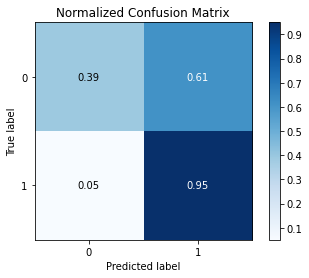

In [16]:
# predict the labels on validation dataset
predictions = clf.predict(X_test)

# compute the performance measures
score = metrics.accuracy_score(y_test, predictions)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_test, predictions, target_names=['0', '1']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, predictions))
print()
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)
plt.show()

In [17]:
df_val = pd.read_csv('data/sample.csv')

# Lower case
df_val['ad']= df_val['ad'].apply(lambda x: x.lower())

# Removing punctuations
df_val['ad']= df_val['ad'].str.replace('[^\w\s]','', regex=True)

# Removing numbers
df_val['ad']= df_val['ad'].str.replace('\d+','', regex=True)

# Removing extra space 
df_val['ad']= df_val['ad'].str.replace('\s+', ' ', regex=True)

#Apply function on review column
df_val['ad']= df_val['ad'].apply(dc.remove_stopwords)

#Apply function on review column
df_val['ad']= df_val['ad'].apply(dc.denoise_text)

#Apply function on review column
df_val['ad']= df_val['ad'].apply(dc.remove_special_characters)

#Apply function on review column
df_val['ad']= df_val['ad'].apply(dc.simple_stemmer)

accuracy:   0.843
              precision    recall  f1-score   support

           0       0.94      0.69      0.79      3143
           1       0.80      0.97      0.87      4000

    accuracy                           0.84      7143
   macro avg       0.87      0.83      0.83      7143
weighted avg       0.86      0.84      0.84      7143

confusion matrix:
[[2155  988]
 [ 133 3867]]



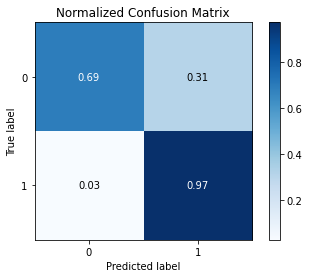

In [18]:
X_val_tf = tf_vectorizer.transform(df['ad'])
y_val = df['emotion']
predictions = clf.predict(X_val_tf)

# compute the performance measures
score = metrics.accuracy_score(y_val, predictions)
print("accuracy:   %0.3f" % score)


print(metrics.classification_report(y_val, predictions, target_names=['0', '1']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_val, predictions))
print()
skplt.metrics.plot_confusion_matrix(y_val, predictions, normalize=True)
plt.show()